
# Homework, Week 2, part 1

*Part of the course:
Introduction to Machine Learning (code: KI2V20001), 26/04/2021 to 02/07/2021, Utrecht University*

Total points: 30

Submit one ipynb file per pair, with filename: ```IML2021_week1_part4_wg#_lastname1_lastname2.ipynb```, with your group number or name in place of the # (if you're in different groups, pick one)




# Machine learning

<br>
<br>

---

**Assignment 1 (programming required)**

1. Generate a random linear binary target function in the (2D) plane. Do this by generating a random perceptron weight vector $\mathbf{w}$ with three elements.
1. Choose the inputs $(\mathbf{x}_1, \ldots, \mathbf{x}_N)$ ($N=16$) to be random points in the plane, and evaluate the target function on each $\mathbf{x}_n$ to get the corresponding output $y_n$. Display the result in a graph.
1.  Plot the examples ${(\mathbf{x}_n, y_n)}$ as well as the target function. Tip: use mathplotlib.
1. Now, implement the perceptron learning algorithm. Tip: write a function that represents the algorithm.
1. Run the perceptron algorithm on the above dataset, and add the resulting hypothesis to the plot. Report the number of iterations.
1. Now, change the initial weight-vector in the perceptron algorithm. So, change $\mathbf{w}(0)$ (do not confuse this with $w_0$). Also see update rule 1.3 in the book of Abu-Mostafa et al (2012). Run the algorithm again and add the hypothesis to the same plot. Repeat this a few times with randomly chosen other initial weights. Are the resulting hypotheses produced by the algorithm always the same?
1. Now, return to the original initial weight. Generate another random dataset of 16 points, and apply the algorithm again. Do this a few times. Compare with the above results. Are there differences in the number of iterations needed?
1. General a dataset of 1000 points and repeat. Compare with above results.


---

<br>
<br>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

[5.58343577 5.43626479 1.45036371]


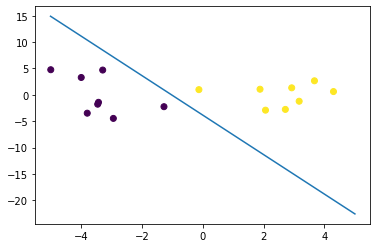

In [63]:
# 1.
target = np.random.rand(3)*10
print(target)

# 2.  inputs
inputs = (np.random.rand(16,3)-0.5)*10
inputs[:,0] = 1
y_actual = [np.sign(target[0]*x[0] + target[1]*x[1] + target[2]*x[2]) for x in inputs]
x = np.linspace(-5,5,100)
yplot = (-target[0]/target[2]) - (target[1]/target[2])*x

plt.scatter(inputs[:,1], inputs[:,2], c = y_actual)
plt.plot(x, yplot)
plt.show()


In [71]:
# question 4& 5
def get_y(weights, x):
    return np.sign(weights[0] + weights[1]*x[1] + weights[2]*x[2])

initial = np.random.rand(3)*10
def perceptron(weight, inputs, y_actual):
    perfect = False
    iterations = 0
    while perfect is False:
        y_now = [get_y(weight, x) for x in inputs]
        for i, y in enumerate(y_now):
            if y == y_actual[i]:
                if i == 15: perfect = True
                continue
            else:
                iterations += 1
                print('updating')
                weight = weight + y_actual[i]*inputs[i]
                break
    return weight, iterations

weight, iterations = perceptron(initial, inputs, y_actual)

updating


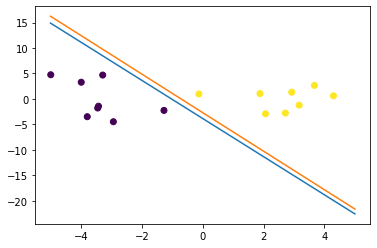

In [70]:
x = np.linspace(-5,5,100)
yplot2 = (-weight[0]/weight[2]) - (weight[1]/weight[2])*x

plt.scatter(inputs[:,1], inputs[:,2], c = y_actual)
plt.plot(x, yplot)
plt.plot(x, yplot2)
plt.show()

updating
updating
updating


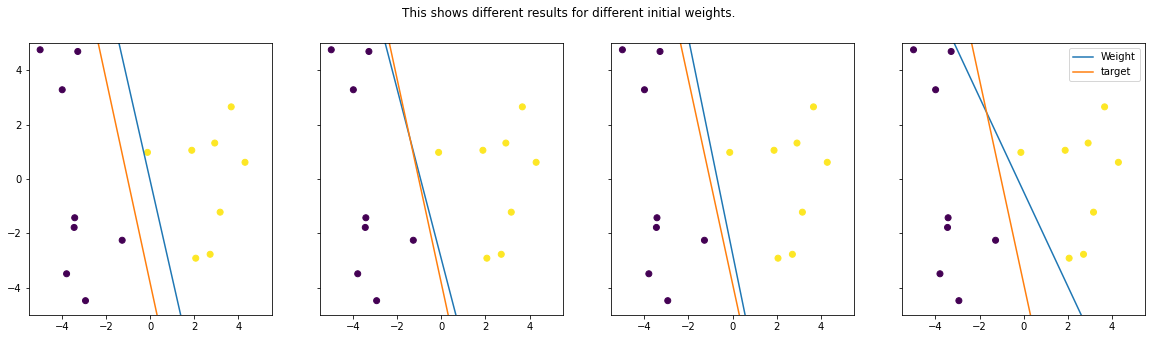

In [94]:
# question 6
# 6. Now, change the initial weight-vector in the perceptron algorithm. So, change $\mathbf{w}(0)$ (do not confuse this with $w_0$). Also see update rule 1.3 in the book of Abu-Mostafa et al (2012). Run the algorithm again and add the hypothesis to the same plot. Repeat this a few times with randomly chosen other initial weights. Are the resulting hypotheses produced by the algorithm always the same?
fig, ax = plt.subplots(1,4, sharey = True, figsize = (20,5))
for i in range(4):
    initial = np.random.rand(3)*10
    weight, iterations = perceptron(initial, inputs, y_actual)
    x = np.linspace(-5,5,100)
    yplot_random_initial = (-weight[0]/weight[2]) - (weight[1]/weight[2])*x
    ax[i].plot(x, yplot_random_initial, label = 'Weight')
    ax[i].scatter(inputs[:,1], inputs[:,2], c = y_actual)
    ax[i].plot(x, yplot, label = 'target')
ax[i].legend()
plt.ylim([-5,5])
plt.suptitle("This shows different results for different initial weights.")
plt.show()

In [ ]:
# 7. Now, return to the original initial weight. Generate another random dataset of 16 points, and apply the algorithm again. Do this a few times. Compare with the above results. Are there differences in the number of iterations needed?
# 8. General a dataset of 1000 points and repeat. Compare with above results.